## 4. evaluating a ML model

three ways to evaluate

1.estimator `score` method

2.the `scoring` parameter

3.problem specific metric function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
hd = pd.read_csv('heart-disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = hd.drop('target', axis = 1)
y = hd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 4.1 evaluating with a score method

In [4]:
clf.score(X_test, y_test)

0.8524590163934426

### do the same for regressor

In [5]:
#import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

reg = RandomForestRegressor(n_estimators = 100)

reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [7]:
reg.score(X_test, y_test)

0.873969014117403

### 4.2 evaluating the model using the  scoring parameter

In [8]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = hd.drop('target', axis = 1)
y = hd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train);

In [9]:
clf.score(X_test, y_test)

0.8524590163934426

In [10]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

#### SO~~~ what is cross validation

CV will split the dataset into different version, for exp, test size 0.2 will use 1/5 of the total data

to run the test, and CV will use different part of the data to construst the test dataset, if cv = 5

the there will be 5 sets of diffrent test data

In [11]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take mean of 5-fond CV score
clf_cv_score = np.mean(cross_val_score(clf,X,y,cv = 5))

#compare the two
clf_single_score, clf_cv_score

(0.8524590163934426, 0.8248087431693989)

In [12]:
# scoring parameter set to None by default, and when it's set to None, 
#it's going to use the default metric of the classifier
#which is the mean accuracy on the given test data and labels.
cross_val_score(clf, X, y, cv=5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Calssification model evaluation metrics

1.accuracy

2.Area under ROC curve 

3.confusion matrix

4.classification report

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = hd.drop('target', axis = 1)
y = hd['target']

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf,X,y,cv = 5)


In [18]:
np.mean(cross_val_score)

0.8248087431693989

In [20]:
print(f'heart disease classifier cross validated accuracy: {np.mean(cross_val_score) *100:.2f}%')

heart disease classifier cross validated accuracy: 82.48%


### area under the receiver operating characteristic curve (AUC/ ROC) 

roc curves are a comparison of a model's true positive rate (tpr) versis a model's positive rate (fpr)

* true positive = model predicts 1 when truth is 1
* false positive = model predicts 1 when truth is 0
* true negative = model predicts 0 when truth is 0
* false positive = model predicts 0 when truth is 1


In [26]:
#create X_test.. etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve

# make predictions with probabilities

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.7 , 0.3 ],
       [0.59, 0.41],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.27, 0.73],
       [0.91, 0.09],
       [0.38, 0.62],
       [0.1 , 0.9 ]])

In [27]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.3 , 0.41, 0.08, 0.92, 0.93, 0.97, 0.73, 0.09, 0.62, 0.9 ])

In [29]:
#calculate fpr, tpr and thresholds

fpr , tpr , threshold = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.03703704, 0.07407407, 0.07407407, 0.11111111,
       0.11111111, 0.14814815, 0.14814815, 0.18518519, 0.22222222,
       0.2962963 , 0.2962963 , 0.33333333, 0.37037037, 0.48148148,
       0.51851852, 0.59259259, 0.7037037 , 0.81481481, 0.85185185,
       0.92592593, 1.        ])

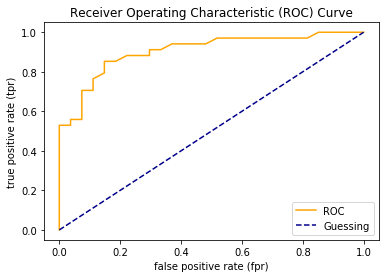

In [82]:
# create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model 
    """
    #plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    #customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
    

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9046840958605664

** confusion metrics **

a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

in essence, giving you an idea of where the model is getting confused

In [86]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 7, 27]])

In [88]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames = ["Actual Label"], colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,4
1,7,27


In [89]:
len(y_preds)

61

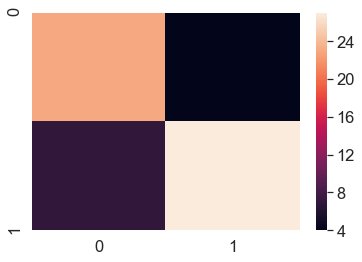

In [91]:
# make our confusion matrix more visualize using seaborn's heatmap

import seaborn as sns

# set the font scale

sns.set(font_scale = 1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat)

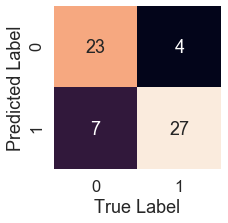

In [96]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
    
    # fix the broken annotations (heppened in matplotlib 3.1.1)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(conf_mat)

** classification report **

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### how to choose the ways of evaluation

In [99]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) #model predict every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
